## ROCAUC

In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the multi-class classification problem, we use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics).

But why do we want to use this other than accuracy?


## Softmax Function

The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

<p align='center'>
    <img src="https://miro.medium.com/max/805/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" width=500, height=300></img>
</p>

## Binary Class

In binary class, the ground truth *y_test* will be taking values 1's and 0's whereas the predicted probabilities from softmax function will give us a list of two probabilities that sum up to 100%, i.e. [90%, 10%]. How accurate is this result?

For example, this [blog](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) has a great example: Red distribution curve is of the positive class (patients with disease) and the green distribution curve is of the negative class(patients with no disease).
<p align='center'><img src='https://miro.medium.com/max/1056/1*Uu-t4pOotRQFoyrfqEvIEg.png' width=500></img></p>
This is an ideal situation. When two curves don’t overlap at all means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.

When two distributions overlap, we introduce type 1 and type 2 errors. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.
<p align='center'><img src='https://miro.medium.com/max/1014/1*yF8hvKR9eNfqqej2JnVKzg.png' width=500></img></p>

This is the worst situation. When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.
<p align='center'><img src='https://miro.medium.com/max/860/1*iLW_BrJZRI0UZSflfMrmZQ.png' width=500></img></p>

In [ ]:
# import
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [16]:
# fake data
model_names = ['M1', 'M2']
y_test = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred_1 = [.9, .9, .9, .9, .9, .5, .4, .3 ,.2, .1]
y_pred_2 = [.8, .9, .8, .9, .8, .9, .2, .8, .9, .2]
y_pred = [y_pred_1, y_pred_2]
len(y_test), len(y_pred_1), len(y_pred_2), len(y_pred[0]), len(y_pred[1])

(10, 10, 10, 10, 10)

In [32]:
# def
def multi_rocauc_plot(
    model_names = ['M1', 'M2'],
    y_test = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    y_pred = [y_pred_1, y_pred_2],
    figsize=(5, 5),
    linewidth=3
):

  """
  model_names: a list of strings for model names such as ['model1', 'model2']
  y_test: a list of integers of 1's and 0's such as [1,1,0,0]
  y_pred: a nested list of predicted probabilities such as [[1,1,0,0],[.9,.8,.7,.6]]
  figsize: a tuple of two integers indicating figure size such as (10, 10)
  linewidth: an integer indicating line width such as 3
  """

  # set up plotting area
  plt.figure(figsize=figsize)

  # models
  i = 0
  for this_y_pred_ in y_pred:
    fpr, tpr, _ = metrics.roc_curve(y_test, this_y_pred_)
    auc = np.round(metrics.roc_auc_score(y_test, this_y_pred_), 4)
    plt.plot(fpr, tpr, label=model_names[i]+", AUC="+str(auc), linewidth=linewidth)
    i += 1

  # decorate
  plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")

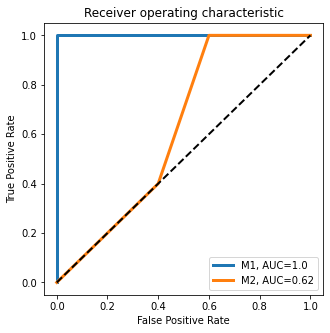

In [33]:
multi_rocauc_plot(
    y_pred = [y_pred_1, y_pred_2],
)

### Imbalanced Data

In [43]:
# fake data
model_names = ['M1', 'M2', 'M3', 'M4']

# the ground truth is imbalanced, here we have 90% class 1 and only 10% class 0
y_test   = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
y_pred_1 = [.5, .5, .5, .5, .5, .5, .5, .5 ,.5, .5]
y_pred_2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred_3 = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
y_pred_4 = [.5, .5, .5, .5, .5, .5, .5, .5 ,.5, .9]
y_pred = [y_pred_1, y_pred_2, y_pred_3, y_pred_4]

Take a pause and take a look at the 4 predictions above. Without making any computation, can you guess which one of the 4 predictions have the highest AUC results?

...
...

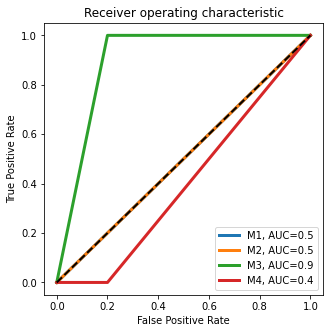

In [44]:
# try it
multi_rocauc_plot(
    model_names,
    y_pred=y_pred)

Investigation ends here.